Diabetes is considered as one of the serious health issues which cause an increase in blood sugar. Many complications occur if diabetes remain untreated unidentified. The aim here is to build a classificattion model to detect diabetes. 
We will be using the folowwing features to make predictions.

1. Pregnncies - Number of times pregnant 
2. Glucose - plasma glucose concentration 
3. Diastolic - diastolic blood pressure (mm Hg)
4. Skin Thickness - skinfold thickness/tricep (mm)
5. Insulin - Hour serum insulin (mu U/ml)
6. BMI - Weight in kg/height in m
7. Diabetes Pedigree Function - Diabetes in family cohort 
8. Age - Age of a person 
9. Diabetes (1=presence of diabetes, 0=absence of diabetes)

# PREDICTING DIABETES WITH MACHINE LEARNING

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
sns.set_style('whitegrid')
plt.style.use('classic')

In [2]:
#loading data
data=pd.read_csv('diabetes 3.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# DATA CLEANING

In [3]:
#checking for null values 
data.isnull().sum()  #there are no null values 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

it will be a serious medical problem if a person have an insulin level and skin thickness of 0. this could therefore 
attribute to the fact that those records were not taking (missing values)

In [4]:
#let's rectify this
print((data[:]==0).sum())  #columns with 0 entries

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [5]:
#looking at percentage of 0 entries
print(((data[:]==0).sum())/768*100)


Pregnancies                 14.453125
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                     65.104167
dtype: float64


48% of the patients did not have their insulin measured. maybe the doctors measured insulin levels of unhealthy looking 
patients or maybe they only measured insulin levels after having first made a preliminary diagnose.
if this is true, this might be a form of data leakage and this will lead to overfitting
in order to check this hypothesis, i will check whether or not the insulin and skin thickness features are corrrelated with
the diagnostic outcome and and such will rule out our concern on data leakage

In [6]:
#filling the 0 entries values for insulin level,skinthickness, BMI and blood pressure 
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=0,strategy='median')
data['Insulin']=imputer.fit_transform(data[['Insulin']])
data['SkinThickness']=imputer.fit_transform(data[['SkinThickness']])
data['BMI']=imputer.fit_transform(data[['BMI']])
data['BloodPressure']=imputer.fit_transform(data[['BloodPressure']])


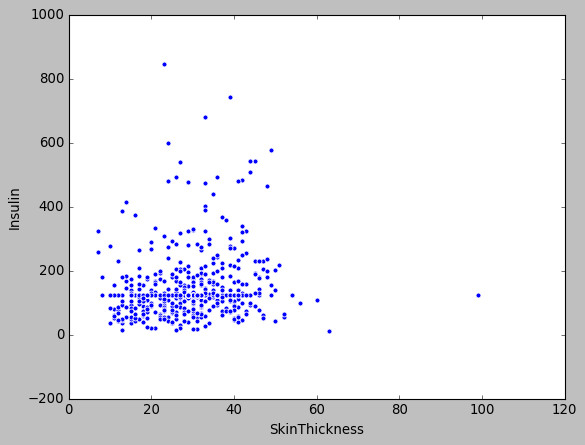

In [7]:
sns.scatterplot(data['SkinThickness'],data['Insulin'])
#these features are not highly correlated with any given outcome and we can rule out the concern of data leakage.
#the 0 values in these categories are still erroneous, however and therefore should not be included in our model
#we will replace these values with distributions near the median.

# EXPLORATORY DATA ANALYSIS

In [8]:
#shape of the data. number of rows and columns 
data.shape

(768, 9)

The database consists of 768 observations and 9 variables. Independent variables contain information about patients. The dependent variable 'Outcome' refers to the patient's diabetic status.

In [9]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
#checking for null values 
data.isnull().sum()   #wow, there are no null values 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
##looking at the datatypes 
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [12]:
#view database information including shape, type and description name. etc
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


In [13]:
##count the number of unique values for each of the descriptors 
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                46
SkinThickness                50
Insulin                     185
BMI                         247
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [14]:
#staististical inference from the data 
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.0000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.0000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


looking at the summary of the diabetes variable, we observe that the mean value is 0.35, which means that around 35% of the 
observations have diabetes therefore the baseline accuracy is 65% and the model we will build should therefore beat this 
baseline benchmark 

# DATA VISUALIZATION 

In [15]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

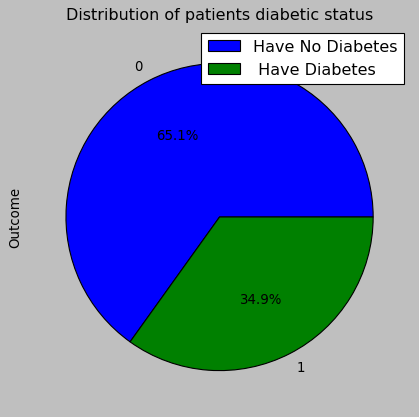

In [16]:
#looking at percentage of people with and with
plt.title('Distribution of patients diabetic status')
data['Outcome'].value_counts().plot.pie(autopct='%1.1f%%')
legend=('Have No Diabetes', ' Have Diabetes')
plt.legend(legend)
plt.show()

From this graph, we can see that there are more non diabetic patients (65.1%) as compared to diabetic patients (34.9%). 

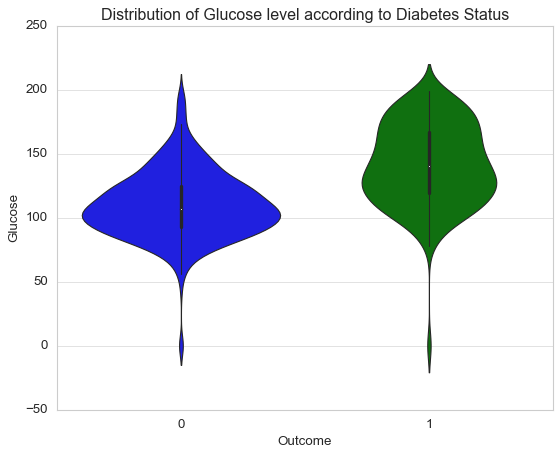

In [17]:
#plotting a violin 
sns.set_style('whitegrid')
sns.violinplot(data['Outcome'],data['Glucose']).set_title('Distribution of Glucose level according to Diabetes Status')
plt.show()

for patients without diabetes, most of them have an glucose level between 50 and 150. However, patients who have glucose level between 100 and 200 are more diabetec patients. From this, it can be deduced that, the higher the glucose level of a patient, the higher probability of contracting diabetes.

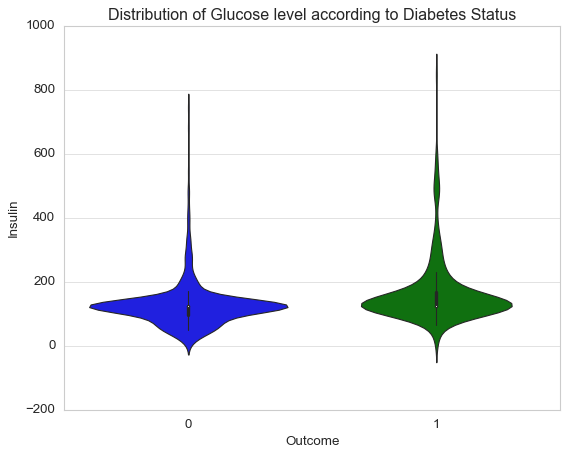

In [18]:
#plotting a violin 
sns.set_style('whitegrid')
sns.violinplot(data['Outcome'],data['Insulin']).set_title('Distribution of Glucose level according to Diabetes Status')
plt.show()

From the violin plot above, patients with diabetes have an insulin level between 50 and 200, There is not much inference for insulin level with respect to diabetes status since the distribution for both diabetic and  non diabetic patients are almost the sane

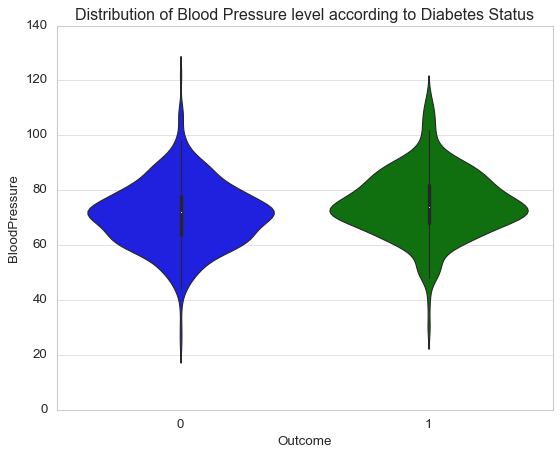

In [19]:
#plotting a violin 
sns.set_style('whitegrid')
sns.violinplot(data['Outcome'],data['BloodPressure']).set_title('Distribution of Blood Pressure level according to Diabetes Status')
plt.show()

Blood pressure level ranges from 24 to 122. From the graph, the higher the blood pressure level, the higher chances of contracting diabetes

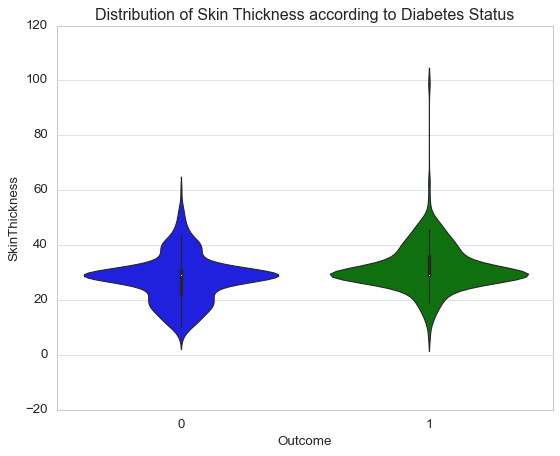

In [20]:
#plotting a violin 
sns.set_style('whitegrid')
sns.violinplot(data['Outcome'],data['SkinThickness']).set_title('Distribution of Skin Thickness according to Diabetes Status')
plt.show()

for people with diabetes, good number of the them have a skin thickness between 20 and 40. However, patients without diabetes have skin thickness ranging from about 10 to 35. it can be deduced that, the higher the skin thickness, the higher chance of contracting the disease. 

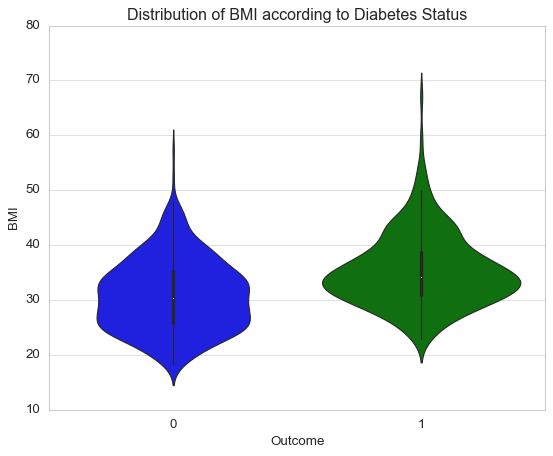

In [21]:
#plotting a violin 
sns.set_style('whitegrid')
sns.violinplot(data['Outcome'],data['BMI']).set_title('Distribution of BMI according to Diabetes Status')
plt.show()

from the vilin plot, its clear that, patients with diabetes have a BMI between 20 and 55 wiyh a majority of them between 25 and 40. non diabetic patients have a BMI ranging between 15 and 50 withamjority of them having a BMi between 25 and 35. This implies patients with high BMI are at a higher risk of getting diabetes.

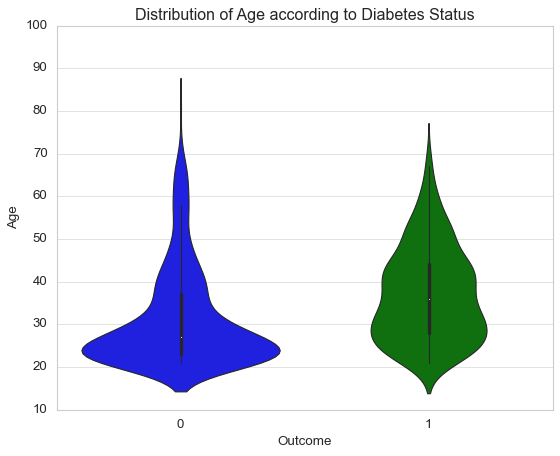

In [22]:
sns.set_style('whitegrid')
sns.violinplot(data['Outcome'],data['Age']).set_title('Distribution of Age according to Diabetes Status')
plt.show()

from the chart, for diabetic patients, the probability or the chances of and old person contracting diabetes is higher than that of an old person. Most of the non diabetic patients are younger, between the ages of 20 and 30. Older people are at risk of gettin diabetis as compared to the younger ones

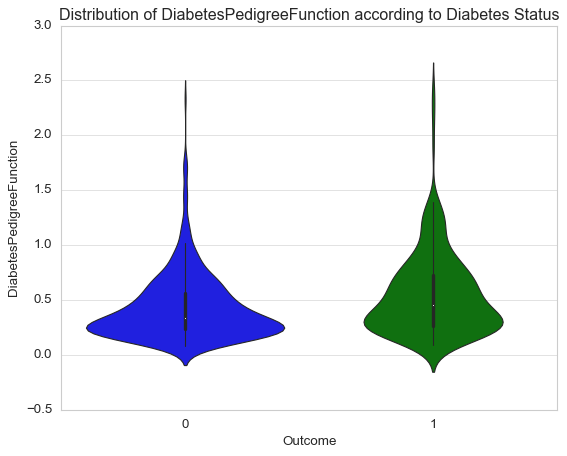

In [23]:
#plotting a violin 
sns.set_style('whitegrid')
sns.violinplot(data['Outcome'],data['DiabetesPedigreeFunction']).set_title('Distribution of DiabetesPedigreeFunction according to Diabetes Status')
plt.show()

The higher the Diabetic Pedigree Function, the higher at risk the patient is in getting diabetes. the DPF for diabetic patiets higher.

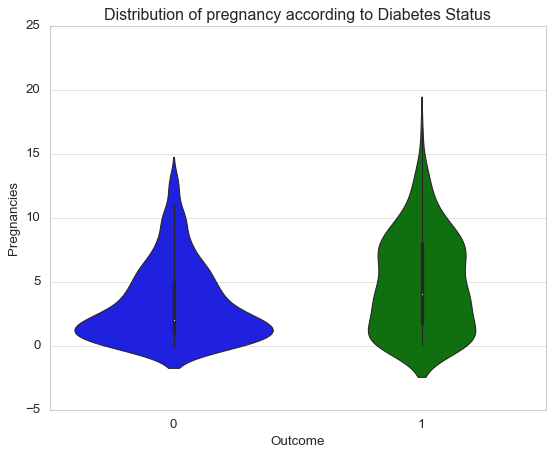

In [24]:
sns.set_style('whitegrid')
sns.violinplot(data['Outcome'],data['Pregnancies']).set_title('Distribution of pregnancy according to Diabetes Status')
plt.show()

patients with a higher number of pregnancies tends to be at risk of getting diabetes as compared to patients with few pregancies. This can be deduce from the violin chart above

<Figure size 640x640 with 0 Axes>

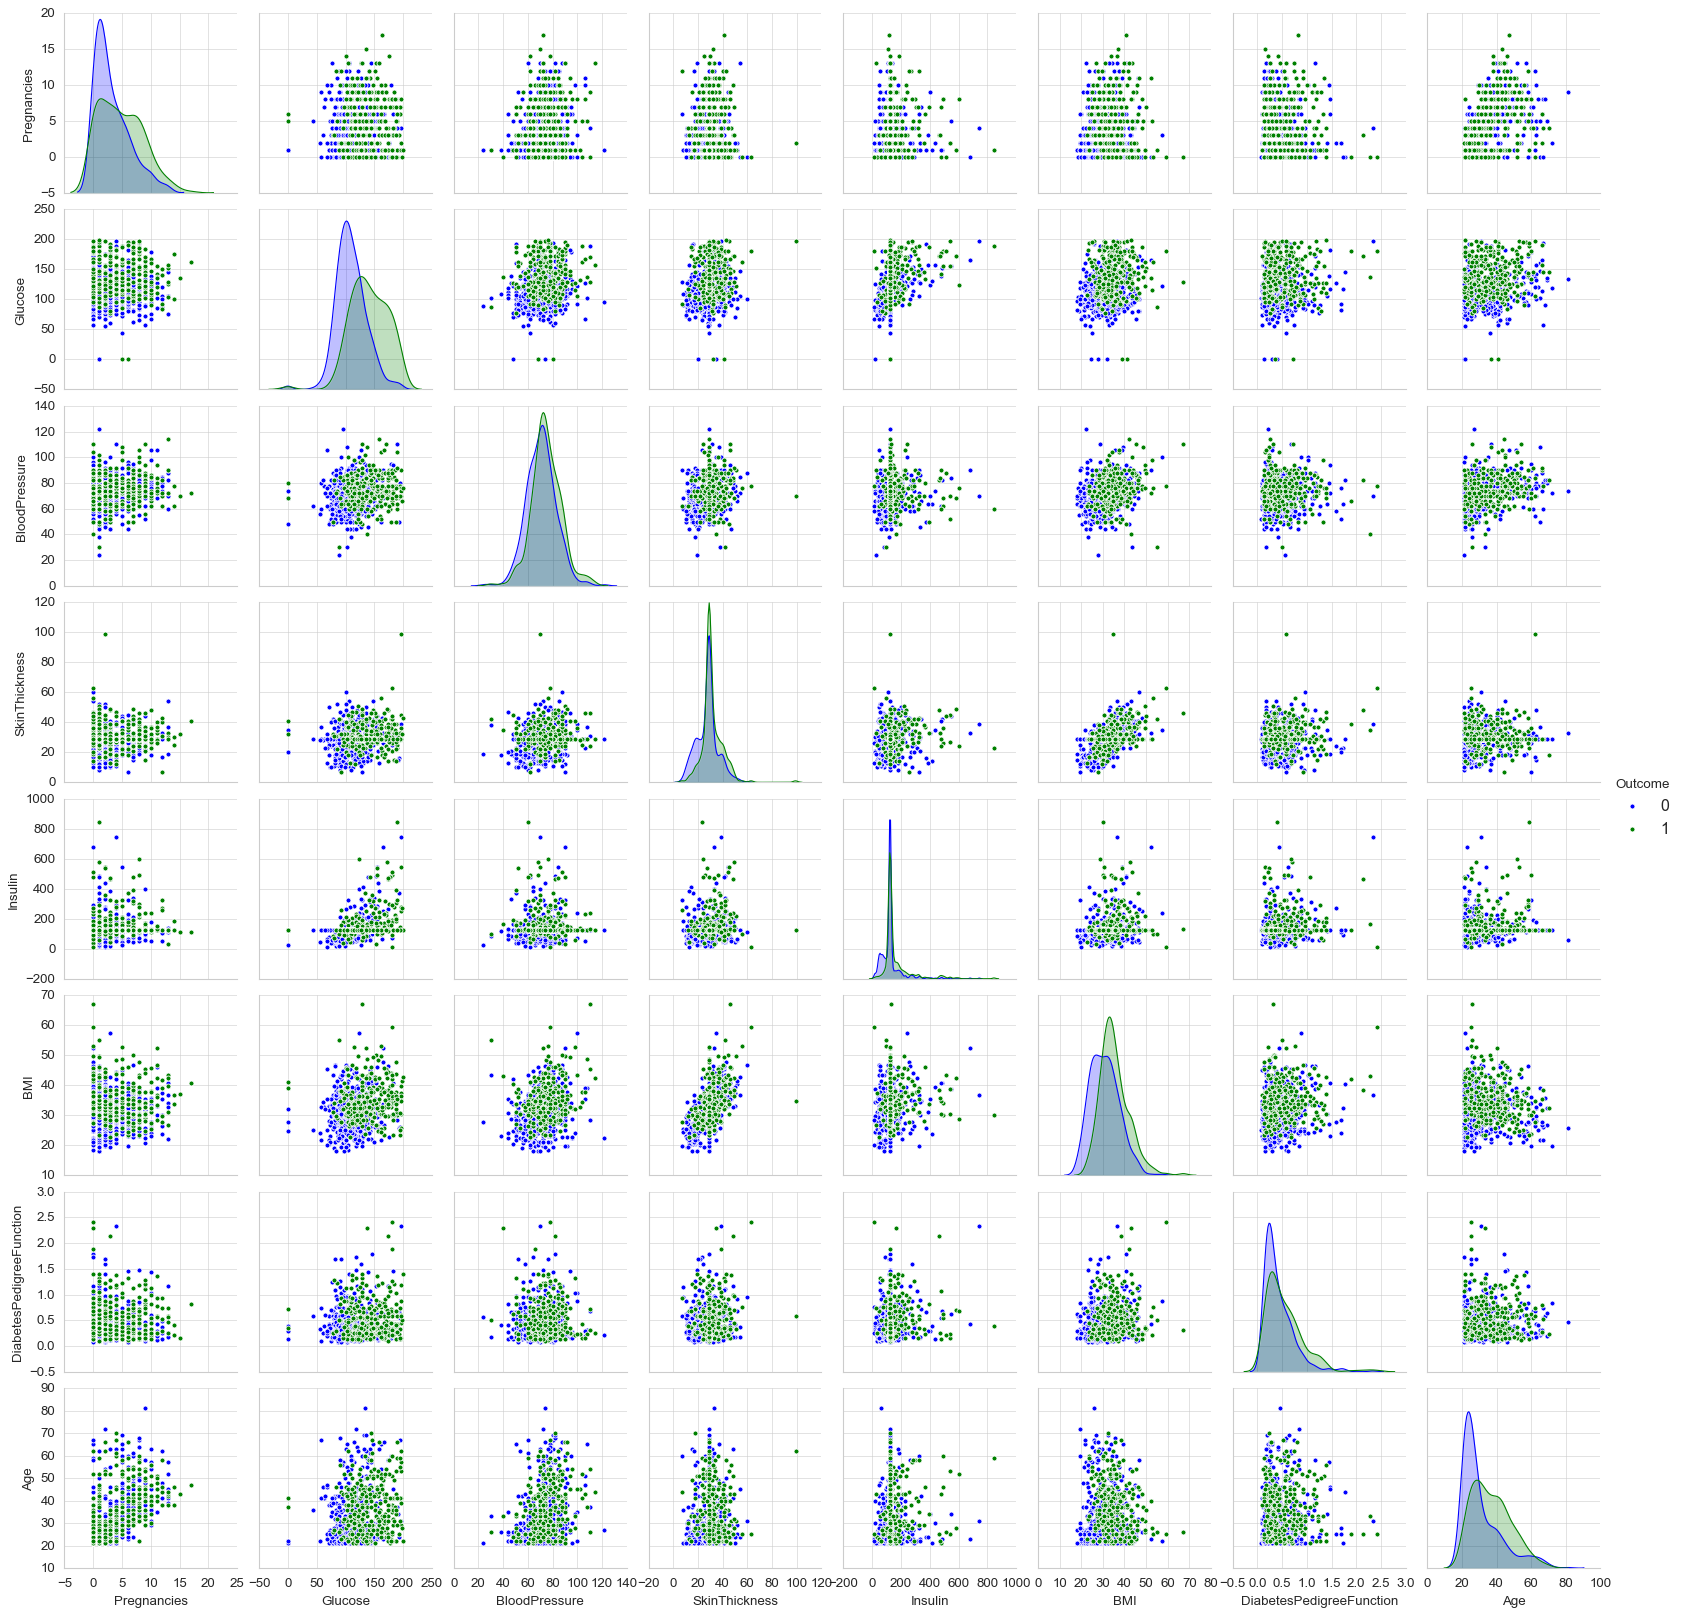

In [25]:
#pairplot for the data to check the relationship between the variables
plt.figure(figsize=(8,8))
sns.set_style('whitegrid')
sns.pairplot(data,hue='Outcome')
plt.show()

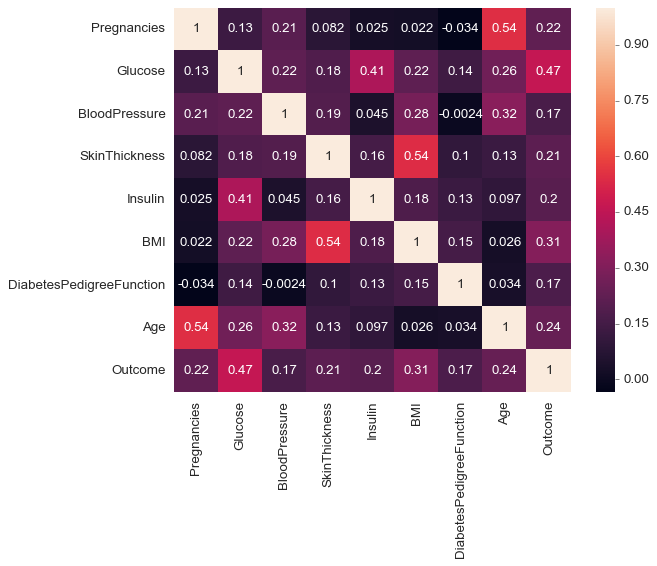

In [26]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In the above heatmap, brighter clors indicate more correlation. from the heatmap, glucose level, age, BMI and number of pregnancies all have significant correlation with the target variable (diabetes status) 

# MACHINE LEARNING (PREDICTIVE MODELLING) 

In [27]:
#importing libraries for prediction
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
import xgboost
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [28]:
#extracting the target variable 
y=data.iloc[:,8]
#extracting the explanatory variables
X=data.iloc[:,0:8]

In [29]:
#importing libraries for splitting the data into train and test (70-30)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [30]:
from sklearn.model_selection import KFold
kfold=KFold(n_splits=5,random_state=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [31]:
#scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit_transform(X)


array([[0.35294118, 0.74371859, 0.48979592, ..., 0.31492843, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.42857143, ..., 0.17177914, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.40816327, ..., 0.10429448, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.48979592, ..., 0.16359918, 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.36734694, ..., 0.24335378, 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.46938776, ..., 0.24948875, 0.10119556,
        0.03333333]])

# RANDOM FOREST CLASSIFIER

In [32]:
rf=RandomForestClassifier(n_estimators=100,max_depth=20,min_samples_leaf=2,min_samples_split=3)
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
print('classification report:{}'.format(classification_report(rf_pred,y_test)))
rf_roc_score=roc_auc_score(rf_pred,y_test)
print(rf_roc_score)


rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
#accuracy for the model 

print(rf.get_params())

classification report:              precision    recall  f1-score   support

           0       0.80      0.82      0.81       147
           1       0.68      0.64      0.66        84

    accuracy                           0.76       231
   macro avg       0.74      0.73      0.74       231
weighted avg       0.76      0.76      0.76       231

0.7329931972789115
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [33]:
kn=KNeighborsClassifier()
kn.fit(X_train,y_train)
kn_pred=kn.predict(X_test)
print(classification_report(kn_pred,y_test))
kn_roc_score=roc_auc_score(kn_pred,y_test)
kn_acc=accuracy_score(kn_pred,y_test)
print("ROC:",kn_roc_score)
kn.get_params()

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       143
           1       0.57      0.52      0.55        88

    accuracy                           0.67       231
   macro avg       0.65      0.64      0.64       231
weighted avg       0.67      0.67      0.67       231

ROC: 0.6424825174825175


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

# KNN CLASSIFIER

In [34]:
#using the K nearest neighbor 
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(X_train,y_train)
kn_pred=kn.predict(X_test)
print('classification report',classification_report(kn_pred,y_test))

print('ROC:',roc_auc_score(kn_pred,y_test)*100)
kn.get_params()

classification report               precision    recall  f1-score   support

           0       0.72      0.76      0.74       143
           1       0.57      0.52      0.55        88

    accuracy                           0.67       231
   macro avg       0.65      0.64      0.64       231
weighted avg       0.67      0.67      0.67       231

ROC: 64.24825174825175


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

# LOGISTIC REGRESSION

In [35]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)
print(classification_report(lr_pred,y_test))
lr_roc_score=roc_auc_score(lr_pred,y_test)
lr_acc=accuracy_score(lr_pred,y_test)
print('Accuracy: ', lr_acc)
print("ROC: ",lr_roc_score)
print(lr.get_params())

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       155
           1       0.60      0.63      0.62        76

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

Accuracy:  0.7402597402597403
ROC:  0.7125636672325977
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# NAIVE BAYES

In [36]:
#using the naive bayes 
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)
nb_pred=nb.predict(X_test)

#Evaluation
print('classification report',classification_report(nb_pred,y_test))
print('ROC:', roc_auc_score(nb_pred,y_test)*100)
nb.get_params()

classification report               precision    recall  f1-score   support

           0       0.79      0.81      0.80       147
           1       0.65      0.62      0.63        84

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.74      0.74      0.74       231

ROC: 71.42857142857143


{'priors': None, 'var_smoothing': 1e-09}

# GRADIENT BOOSTING

In [37]:
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
gb_pred=gb.predict(X_test)
print(classification_report(gb_pred,y_test))
gb_roc_score=roc_auc_score(gb_pred,y_test)
print(gb_roc_score)
print(gb.get_params())

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       139
           1       0.68      0.59      0.63        92

    accuracy                           0.72       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.72      0.72      0.72       231

0.6999530810134502
{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'presort': 'deprecated', 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


# SVM

In [38]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train,y_train)
sv_pred=sv.predict(X_test)

print('classification report',classification_report(sv_pred,y_test))
print('ROC:', roc_auc_score(sv_pred,y_test)*100)

sv.get_params()
print(sv.get_params())

classification report               precision    recall  f1-score   support

           0       0.88      0.76      0.82       175
           1       0.47      0.68      0.56        56

    accuracy                           0.74       231
   macro avg       0.68      0.72      0.69       231
weighted avg       0.78      0.74      0.75       231

ROC: 71.92857142857143
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


XGBOOST

In [39]:
xgb=xgboost.XGBClassifier()
xgb.fit(X_train,y_train)
xgb_pred=xgb.predict(X_test)
print(classification_report(xgb_pred,y_test))
xgb_roc_score=roc_auc_score(xgb_pred,y_test)
print(xgb_roc_score)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:07:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.76      0.83      0.80       138
           1       0.71      0.61      0.66        93

    accuracy                           0.74       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.74      0.74      0.74       231

0.7231182795698924


ADABOOST CLASSIFIER

In [40]:
ada=AdaBoostClassifier(n_estimators=200, learning_rate=1.0)
ada.fit(X_train,y_train)
ada_pred=ada.predict(X_test)
print(classification_report(ada_pred,y_test))
ada_roc_score=roc_auc_score(ada_pred,y_test)
print(ada_roc_score)

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       150
           1       0.62      0.62      0.62        81

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

0.7086419753086421


In [41]:
models=['Logistic Regression', 'Random Forest','XGBoost', 'KNN','Ada Boost','Gradient Boosting']
roc=[lr_roc_score, rf_roc_score, xgb_roc_score, kn_roc_score, ada_roc_score, gb_roc_score]
pd.DataFrame(roc, index=models)

,0
Logistic Regression,0.712564
Random Forest,0.732993
XGBoost,0.723118
KNN,0.642483
Ada Boost,0.708642
Gradient Boosting,0.699953


In [42]:
features_label=X.columns
importances=rf.feature_importances_
indices=(np.argsort(importances)[::-1])
for i in range(X.shape[1]):
    print((i+1, 30, features_label[i], importances[indices[i]]))
indices

(1, 30, 'Pregnancies', 0.30742847370329424)
(2, 30, 'Glucose', 0.16889760479584964)
(3, 30, 'BloodPressure', 0.1396403149079072)
(4, 30, 'SkinThickness', 0.09860249475426422)
(5, 30, 'Insulin', 0.08486131925352415)
(6, 30, 'BMI', 0.07527276158333086)
(7, 30, 'DiabetesPedigreeFunction', 0.06546354430608564)
(8, 30, 'Age', 0.059833486695744106)


array([1, 5, 7, 6, 4, 2, 3, 0], dtype=int64)

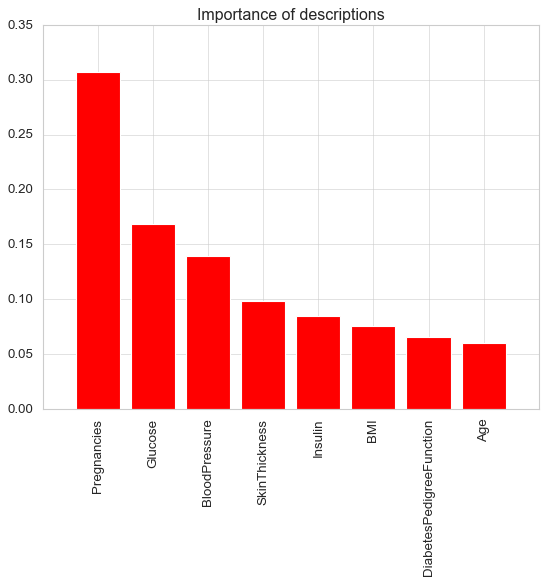

In [43]:
plt.title('Importance of descriptions')
plt.bar(range(X.shape[1]),importances[indices], color='red', align='center')
plt.xticks(range(X.shape[1]), features_label, rotation=90)
plt.show()

The above graph shows the descriptors with the highest importance value and the lowest importance value. It shows that the most important descriptors are number of pregnancies, glucose level, blood pressure, skin thickness, insulin leve etc 

MODEL OPTIMIZATION WITH CROSS VALIDATION

In [44]:
from sklearn.model_selection import cross_val_score

# Function which gives as output the roc_auc measurement plus the standard deviation (STD)
def cvDict(functions, X_train, y_train, cv, scr):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, y_train, cv = cv, scoring = scr)
        print('\n', str(func).split('(')[0],':', cvScore)
        cvDict[str(func).split('(')[0]] = [round(cvScore.mean(),2), cvScore.std()]
        
    return cvDict

In [45]:
models = [ada, gb, xgb, lr,rf, kn,sv]
print(' Roc_auc score for a cv = 5')
cvD = cvDict(models, X_train, y_train, 5, scr ='roc_auc')
print('\n','='*100, '\n')
print('Average Score plus STD for each model')
cvD

 Roc_auc score for a cv = 5

 AdaBoostClassifier : [0.78270677 0.78233083 0.82509653 0.73474903 0.77765065]

 GradientBoostingClassifier : [0.87368421 0.8462406  0.85366795 0.77220077 0.81273837]
[14:08:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:08:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:08:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:08:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:08:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 XGBClassifier : [0.86466165 0.79924812 0.81428571 0.73552124 0.81388253]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_


 LogisticRegression : [0.88571429 0.8075188  0.85405405 0.80656371 0.82494279]

 RandomForestClassifier : [0.88458647 0.82142857 0.86795367 0.79266409 0.86803966]

 KNeighborsClassifier : [0.84774436 0.71296992 0.80733591 0.78243243 0.77021358]

 SVC : [0.89887218 0.79097744 0.85328185 0.81119691 0.81540809]


Average Score plus STD for each model


{'AdaBoostClassifier': [0.78, 0.028629848746752302],
 'GradientBoostingClassifier': [0.83, 0.03565500082776802],
 'XGBClassifier': [0.81, 0.04143348513617878],
 'LogisticRegression': [0.84, 0.030321952966946904],
 'RandomForestClassifier': [0.85, 0.03435326315131769],
 'KNeighborsClassifier': [0.78, 0.04437477994339146],
 'SVC': [0.83, 0.038201456197353156]}

CONCLUSION

In this project, I worked on models that predict the possibility of a person having diabetes or not. During the exploratory data analysis, I found that clients patients with high glucose level, higher blood pressure, higher values of skin thickness, high Body Mass Index, higher number of being pregannt and older people are at a higher risk of contracting diabetes.  

The strongest predictors of diabetes are number of pregnancies, glucose level, blood pressure, skin thickness, insulin level, BMI etc. These are the major predictors (order of impoertance) that determines the possibility of a person being a a diabetic patient  

After using multiple models I ended up with three models (GradientBoosting, Logistic Regression and Random Forest) that performed better than other ML models. I decided to go further with cross validation to prevent overfitting (that this model can be applied perfectly on an unseen data) and to optimize the model to achieve a higher accuracy. Since the issue is with binary classification with an imbalance database, I used the most efficient metric for model performance which is ROC-AUC score and my model hit about 84% "Accuracy".

In [46]:
import pickle
#saving and storing the data for deployment with streamlit
#open a file want to store the data
file=open('DiabetesGB.pkl','wb')
##dump that file 
pickle.dump(gb,file)
model=pickle.load(open('DiabetesGB.pkl','rb'))